In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings

In [2]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
data.sum().isna()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [4]:
len(data.sum())

14

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

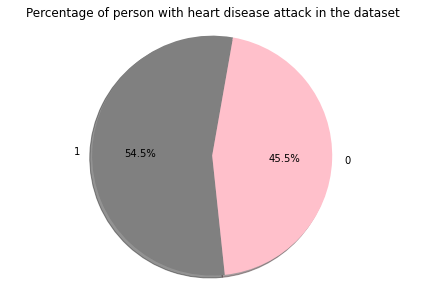

In [6]:
heart = Counter(data["output"])
classes = []
count = []
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["gray", "pink"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis("equal")
plt.tight_layout()
plt.title("Percentage of person with heart disease attack in the dataset")
plt.show();

# Distribution features

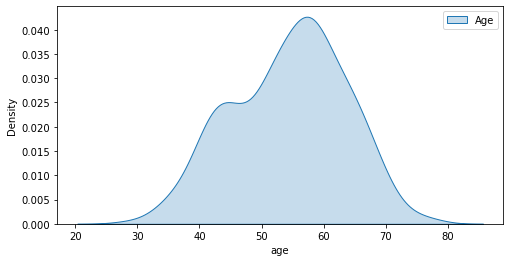

In [7]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data["age"], shade=True, label="Age")
plt.legend()
plt.show();

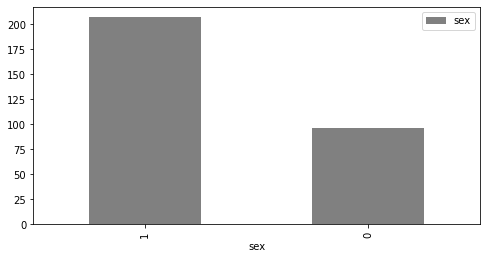

In [8]:
fig = plt.figure(figsize=(8,4))
data["sex"].value_counts().plot(kind="bar", label="sex", color="gray")
plt.xlabel("sex")
plt.legend()
plt.show();

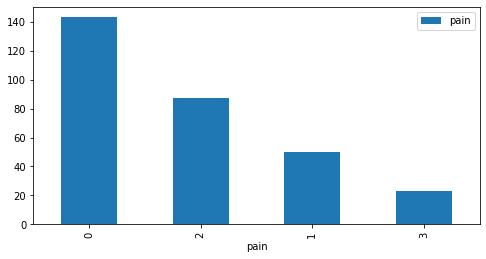

In [9]:
fig = plt.figure(figsize=(8,4))
data["cp"].value_counts().plot(kind = "bar", label="pain")
plt.xlabel("pain")
plt.legend()
plt.show();

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


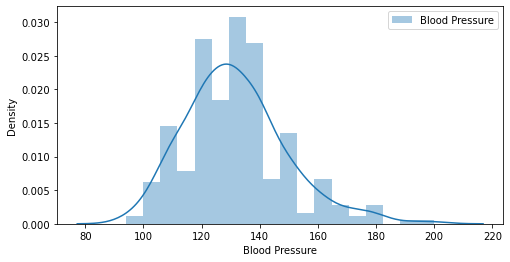

In [10]:
fig = plt.figure(figsize=(8,4))
sns.distplot(data["trtbps"], kde=True, label="Blood Pressure")
plt.xlabel("Blood Pressure")
plt.legend()
plt.show();

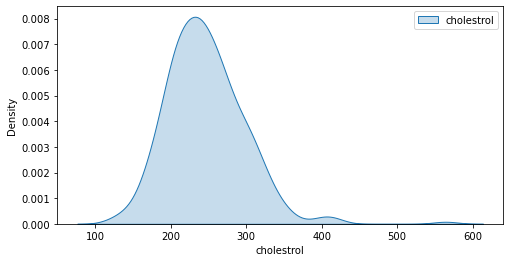

In [11]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data["chol"], shade=True, label="cholestrol")
plt.xlabel("cholestrol")
plt.legend()
plt.show();

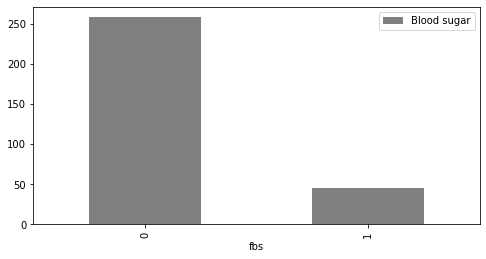

In [12]:
fig = plt.figure(figsize=(8,4))
data["fbs"].value_counts().plot(kind="bar", color="grey", label="Blood sugar")
plt.xlabel("fbs")
plt.legend()
plt.show();

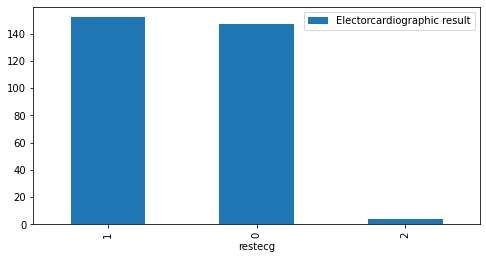

In [13]:
fig = plt.figure(figsize=(8,4))
data["restecg"].value_counts().plot(kind="bar", label="Electorcardiographic result")
plt.xlabel("restecg")
plt.legend()
plt.show();

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


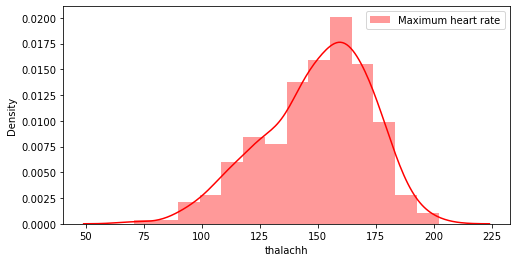

In [14]:
fig = plt.figure(figsize=(8,4))
sns.distplot(data["thalachh"], color="red", kde=True ,label="Maximum heart rate")
plt.xlabel("thalachh")
plt.legend()
plt.show();

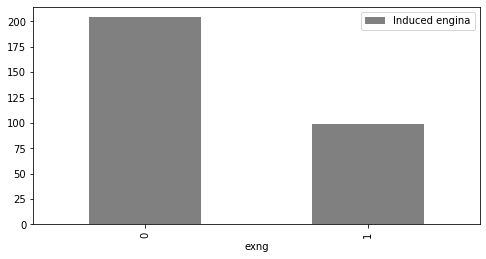

In [15]:
fig = plt.figure(figsize=(8,4))
data["exng"].value_counts().plot(kind="bar", label = "Induced engina", color="grey")
plt.xlabel("exng")
plt.legend()
plt.show();

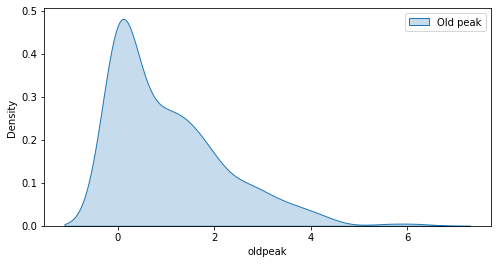

In [16]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data["oldpeak"], shade=True, label="Old peak")
plt.xlabel("oldpeak")
plt.legend()
plt.show();

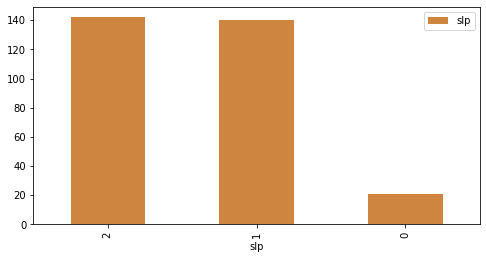

In [17]:
fig = plt.figure(figsize=(8,4))
data["slp"].value_counts().plot(kind="bar", color="peru")
plt.xlabel("slp")
plt.legend()
plt.show();

<AxesSubplot:>

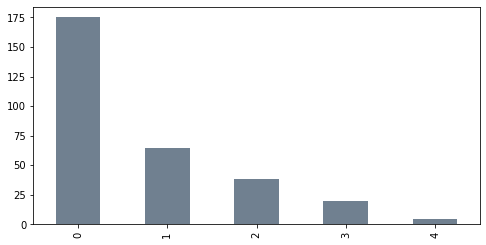

In [18]:
fig = plt.figure(figsize=(8,4))
data["caa"].value_counts().plot(kind="bar", color="slategrey")

# Distribution of Feature that causes heart attacks 

In [19]:
heart = data[data["output"]==1]["age"].fillna(0.0).astype(float)
heart_no = data[data["output"]==0]["age"].fillna(0.0).astype(float)
fi = ff.create_distplot([heart,heart_no], ["Heart Disease", "No Heart Disease"],
                       bin_size=0.65, curve_type="normal", colors=["navy", "peru"])
fi.update_layout(
    title="Heart Attack Distribution over age",
    xaxis_title="Age"
)
fi.show();

In [20]:
heart = data[data["output"]==1]["thalachh"].fillna(0.0).astype(float)
heart_no = data[data["output"]==0]["thalachh"].fillna(0.0).astype(float)
fi = ff.create_distplot([heart, heart_no], ["Heart Disease", "No Heart Disease"],
                        bin_size= 0.65, curve_type="normal" ,colors=["red", "green"])
fi.update_layout(
    title="Heart Distribution over Thalachh",
    xaxis_title="Heart Rate"
)
fi.show();

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



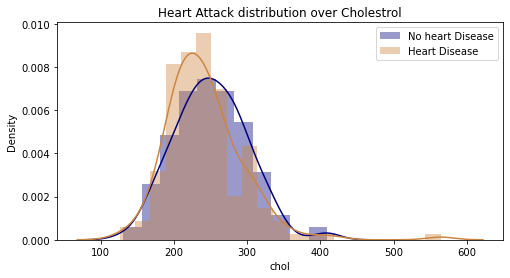

In [21]:
fig = plt.figure(figsize=(8,4))
sns.distplot(data[data["output"]==0]["chol"], color="navy", label="No heart Disease")
sns.distplot(data[data["output"]==1]["chol"], color="peru", label="Heart Disease")
plt.title("Heart Attack distribution over Cholestrol")
plt.legend()
plt.show();

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Sannan Uzair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



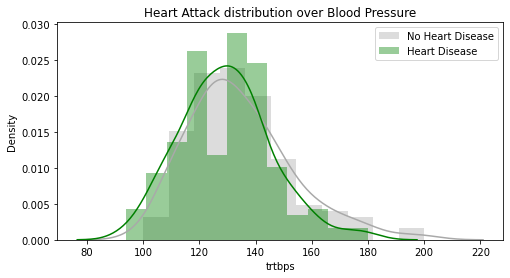

In [22]:
fig = plt.figure(figsize=(8,4))
sns.distplot(data[data["output"]==0]["trtbps"], color="darkgray", label="No Heart Disease")
sns.distplot(data[data["output"]==1]["trtbps"], color="green", label = "Heart Disease")
plt.title("Heart Attack distribution over Blood Pressure")
plt.legend()
plt.show();

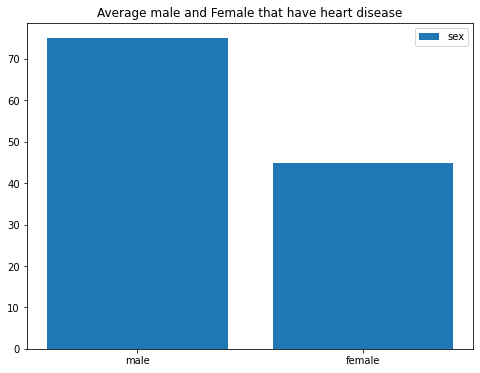

In [23]:
fig = plt.figure(figsize=(8,6))
df=data
name = "sex"
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male", "female"]
plt.bar(x,l, label=name)
plt.title("Average male and Female that have heart disease")
plt.legend()
plt.show();

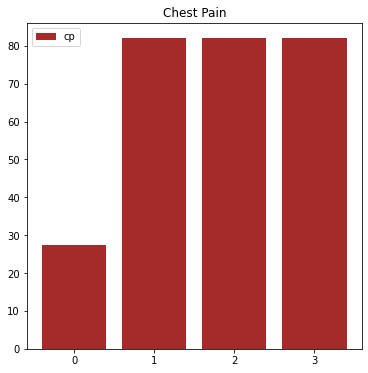

In [24]:
fig = plt.figure(figsize=(6,6))
df=data
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x, l, label = name, color="brown")
plt.title("Chest Pain")
plt.legend()
plt.show();

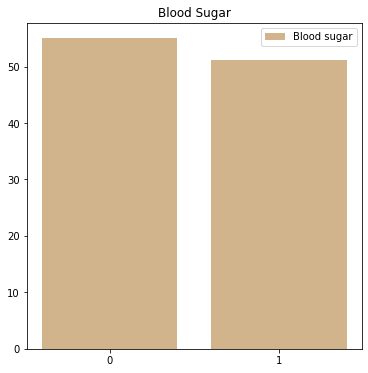

In [25]:
fig = plt.figure(figsize=(6,6))
df = data
name = "fbs"
l = [(100)*df[df[name]==0]["output"].sum()/len(df[df[name]==0]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"])]
x = ["0", "1"]
plt.bar(x, l, label = "Blood sugar", color="tan")
plt.title("Blood Sugar")
plt.legend()
plt.show();

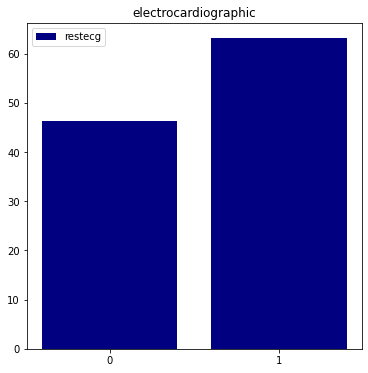

In [26]:
fig = plt.figure(figsize= (6,6))
df = data
name = "restecg"
l = [(100)*df[df[name]==0]["output"].sum()/len(df[df[name]==0]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"])]
x = ["0", "1"]
plt.bar(x,l, label=name, color="navy")
plt.title("electrocardiographic")
plt.legend()
plt.show();

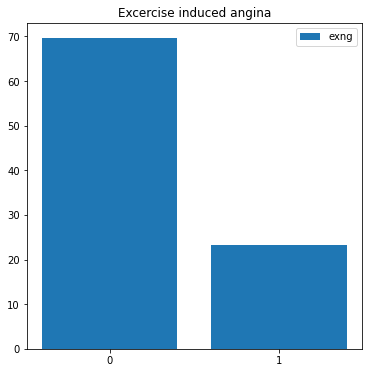

In [27]:
fig = plt.figure(figsize=(6,6))
df = data
name = "exng"
l = [(100)*df[df[name]==0]["output"].sum()/len(df[df[name]==0]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"])]
x = ["0", "1"]
plt.bar(x,l, label = name)
plt.title("Excercise induced angina")
plt.legend()
plt.show();

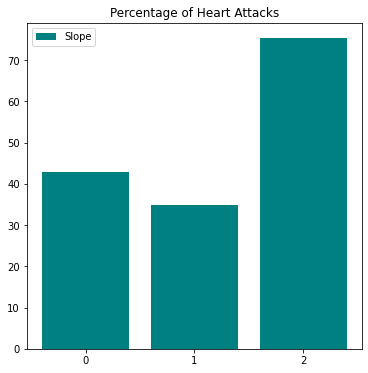

In [28]:
fig = plt.figure(figsize=(6,6))
df = data
name = "slp"
l = [(100)*df[df[name]==0]["output"].sum()/len(df[df[name]==0]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),
    (100)*df[df[name]==2]["output"].sum()/len(df[df[name]==2]["output"])]
x = ["0", "1", "2"]
plt.bar(x,l, label = "Slope", color="teal")
plt.title("Percentage of Heart Attacks")
plt.legend()
plt.show();

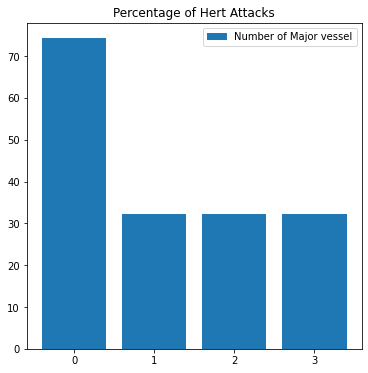

In [29]:
fig = plt.figure(figsize=(6,6))
df = data
name = "caa"
l = [(100)*df[df[name]==0]["output"].sum()/len(df[df[name]==0]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),]
x = ['0','1','2','3']
plt.bar(x,l, label ="Number of Major vessel")
plt.title("Percentage of Hert Attacks")
plt.legend()
plt.show();

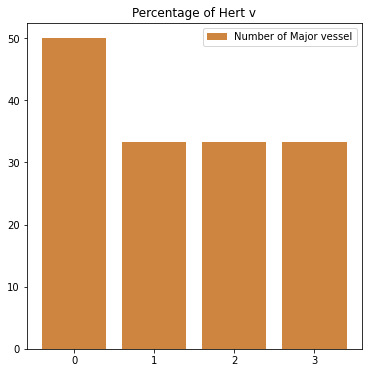

In [30]:
fig = plt.figure(figsize=(6,6))
df = data
name = "thall"
l = [(100)*df[df[name]==0]["output"].sum()/len(df[df[name]==0]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),
    (100)*df[df[name]==1]["output"].sum()/len(df[df[name]==1]["output"]),]
x = ['0','1','2','3']
plt.bar(x,l, label ="Number of Major vessel", color="peru")
plt.title("Percentage of Hert v")
plt.legend()
plt.show();

# Distirbution of attributes having hue= Heart Attack 

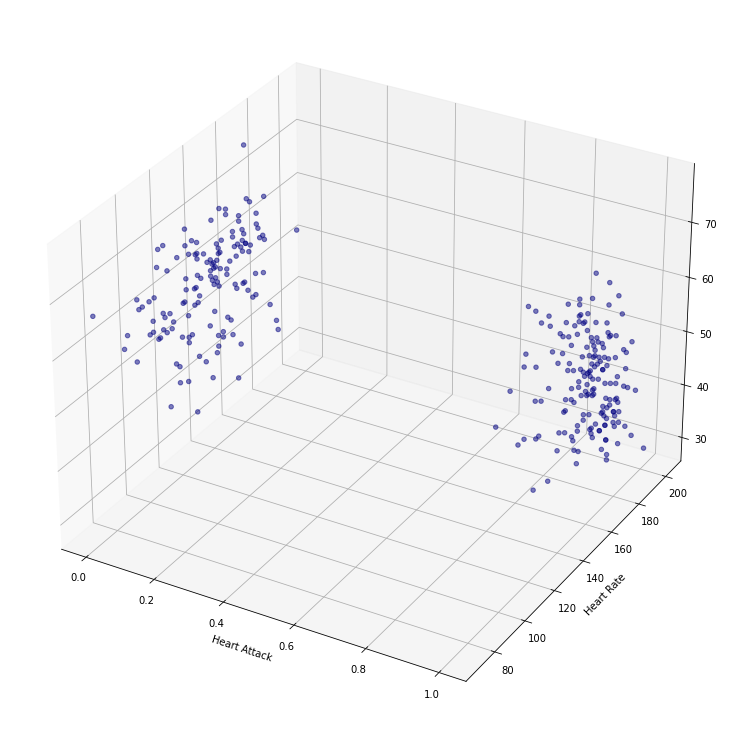

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(data["output"], data["thalachh"], data["age"], c="navy", s=20, alpha=0.5)
plt.xlabel("Heart Attack")
plt.ylabel("Heart Rate")
plt.show();

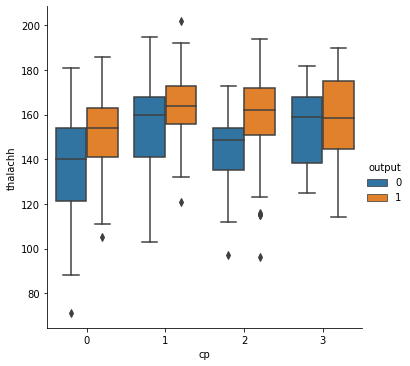

In [32]:
sns.catplot(x="cp", y="thalachh", hue="output", kind="box", data=data);

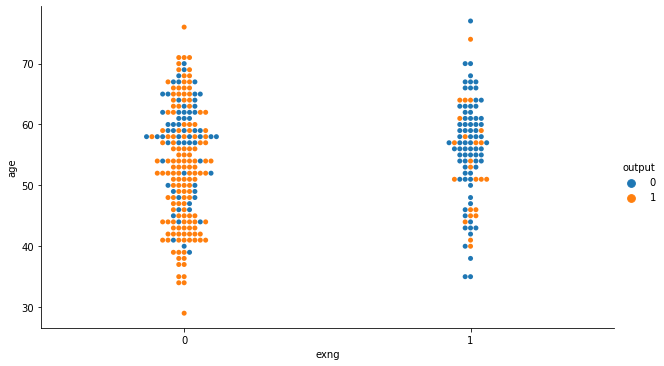

In [33]:
sns.catplot(data=data, x="exng", y="age", hue="output", aspect=1.7, kind="swarm");

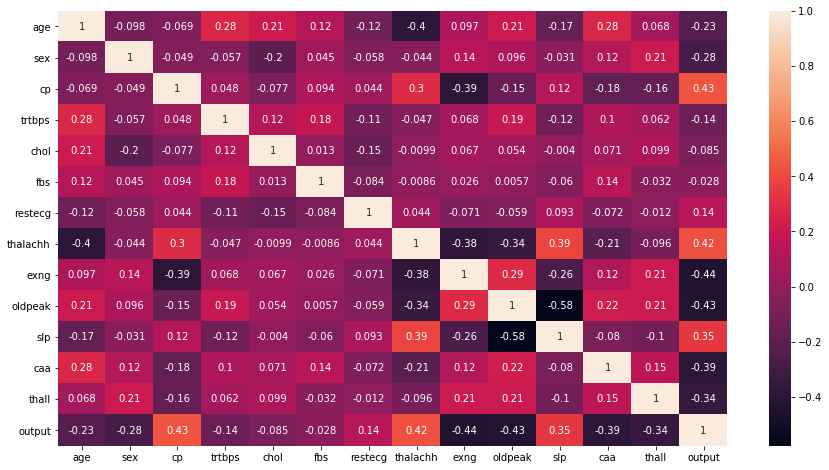

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True);

In [35]:
data.output

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop("output", axis=1)
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
X_train

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
86    68    1   2     118   277    0        1       151     0      1.0    2   
107   45    0   0     138   236    0        0       152     1      0.2    1   
94    45    0   1     112   160    0        1       138     0      0.0    1   
212   39    1   0     118   219    0        1       140     0      1.2    1   
20    59    1   0     135   234    0        1       161     0      0.5    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
38    65    0   2     155   269    0        1       148     0      0.8    2   
179   57    1   0     150   276    0        0       112     1      0.6    1   
109   50    0   0     110   254    0        0       159     0      0.0    2   
216   62    0   2     130   263    0        1        97     0      1.2    1   
256   58    1   0     128   259    0        0       130     1      3.0    1   

     caa  thall  
86     1      3  
107    0      2  
94     0      2  
212    0      3  
20     0      3  
..   ...    ...  
38     0      2  
179    1      1  
109    0      2  
216    1      3  
256    2      3  

[212 rows x 13 columns]

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8571428571428571

In [41]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [42]:
pred = model.predict(X_test)
np.mean(pred == y_test)

0.8571428571428571

In [43]:
model.score(X_test, y_test)

0.8571428571428571

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8571428571428571

In [45]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.57, 0.43],
       [0.6 , 0.4 ],
       [0.11, 0.89],
       [0.67, 0.33],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.93, 0.07],
       [0.82, 0.18],
       [0.43, 0.57],
       [0.76, 0.24]])

In [46]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.43, 0.4 , 0.89, 0.33, 0.19, 0.02, 0.07, 0.18, 0.57, 0.24])

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.02222222,
       0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
       0.04444444, 0.04444444, 0.04444444, 0.04444444, 0.06666667,
       0.06666667, 0.08888889, 0.11111111, 0.11111111, 0.13333333,
       0.17777778, 0.2       , 0.2       , 0.28888889, 0.31111111,
       0.35555556, 0.44444444, 0.44444444, 0.46666667, 0.51111111,
       0.51111111, 0.55555556, 0.6       , 0.6       , 0.62222222,
       0.71111111, 0.75555556, 0.8       , 0.88888889, 1.        ])

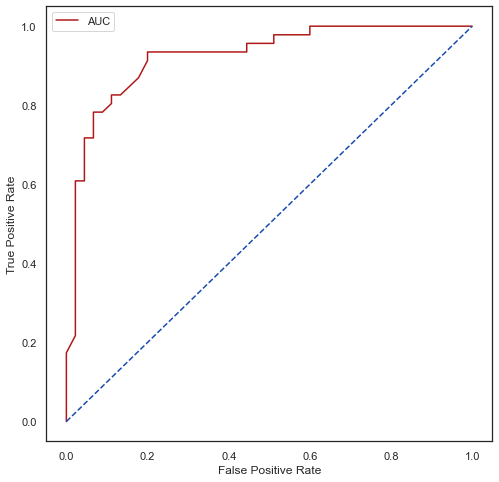

In [48]:
def plot_roc_curve(fpr, tpr):
    sns.set_theme(style="white")
    plt.figure(figsize=(8,8))
    plt.plot(fpr,tpr,color= "#b01717" ,label = "AUC")
    plt.plot([0,1],[0,1], linestyle="--" ,color="#174ab0")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9239130434782609

In [50]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[40,  5],
       [ 8, 38]], dtype=int64)

Text(30.5, 0.5, 'Predicted labels')

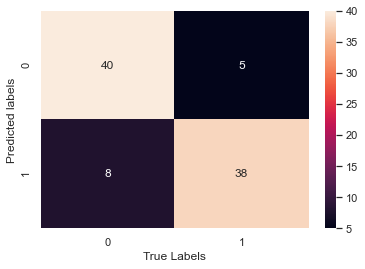

In [51]:
heat_map = confusion_matrix(y_test, y_preds)
sns.heatmap(heat_map, annot=True);
plt.xlabel("True Labels")
plt.ylabel("Predicted labels")

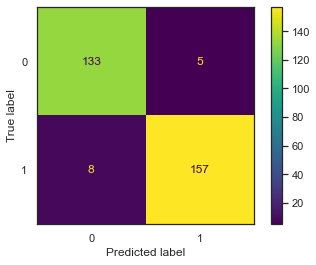

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X, y);

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.88      0.83      0.85        46

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

